In [ ]:
!pip install geopandas matplotlib
!pip install pyarrow
!pip install contextily 
!pip install XlsxWriter 


In [22]:
import geopandas as gpd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import contextily as ctx 

import pandas as pd
pd.set_option('mode.chained_assignment', None)


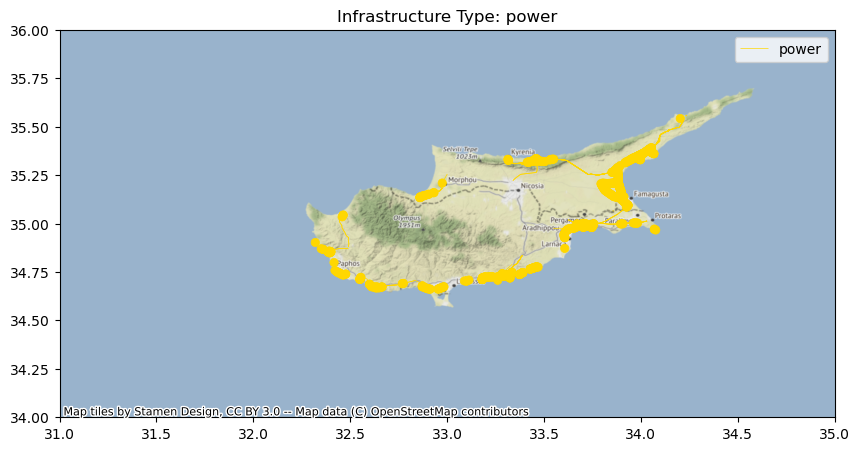

In [24]:
#read the parquet file with geopandas Dataframe
data = gpd.read_parquet('C:\Data\CEED\coastal_osm_exact/CYP_cis.parquet')
#select column containing the infrastructure type 
data = data.reset_index()
data['infra_type'] = data['level_0'] 

color_mapping = {
    'road': '#666666',
    'education': '#631930',
    'oil':'#474140',
    'power':'#ffd700',
    'telecom':'#0e2f44',
    'water':'#00ced1',
    'healthcare':'#990000',
    'wastewater': '#133337'
}


#user select infra type
infra_type = 'power'#input("Enter the infrastructure type: ")

#filter data based on user's request
filtered_data = data[data['infra_type'] == infra_type]

filtered_data['color'] = color_mapping[infra_type]


#extent of basemap
extent = (31, 35, 34, 36)

fig, ax = plt.subplots(figsize=(10, 10))
#change linewidth and color 
filtered_data.plot(ax=ax, linewidth=0.5, color=filtered_data['color'])

#Min and max for the axis 
ax.set_xlim([31, 35])
ax.set_ylim([34, 36])

ax.axis(extent)
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Terrain)

#legend 
ax.legend([infra_type] if infra_type in filtered_data['infra_type'].unique() else [])

#title and labels
ax.set_title("Infrastructure Type: " + infra_type)
ax.legend([infra_type])

# Show the plot
plt.show()


In [16]:
color_mapping[infra_type]

'#631930'

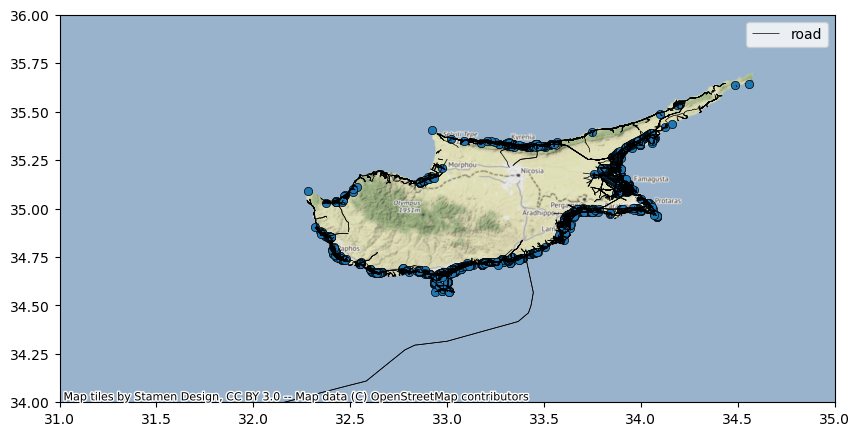

In [3]:
#extent of basemap
extent = (31, 35, 34, 36)

fig, ax = plt.subplots(figsize=(10, 10))
#change linewidth and color 
data.plot(ax=ax, linewidth=0.5, edgecolor='k', facecolor='none')

#Min and max for the axis 
ax.set_xlim([31, 35])
ax.set_ylim([34, 36])

ax.axis(extent)
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Terrain)

#legend 
ax.legend([infra_type])